## ✅ MVP: Personalized_healthcare Daniel Prado

### 🩺 Contexto

Com o avanço dos dispositivos vestíveis (wearables) e sensores de saúde conectados à nuvem, tornou-se possível monitorar continuamente sinais vitais e comportamentos de indivíduos em tempo real. Esses dados oferecem uma oportunidade valiosa para prever condições de saúde, detectar padrões de comportamento e antecipar eventos críticos, como quedas, fadiga ou alterações fisiológicas anormais.

---

### 🎯 Descrição do Problema

O objetivo deste projeto é realizar uma análise exploratória e pré-processamento de um conjunto de dados de monitoramento de saúde personalizado, com foco em entender os padrões fisiológicos e comportamentais dos usuários, e preparar os dados para aplicações futuras de aprendizado de máquina, como:

- Classificação de atividades físicas
- Detecção de anomalias fisiológicas
- Previsão de eventos de saúde (ex: quedas, sono ruim, etc.)

---

### 🧠 Tipo de Problema

Este é um problema de **aprendizado supervisionado**, com a variável-alvo sendo `activity_label`, que representa a atividade realizada pelo usuário em cada instante.

---

### 🔍 Premissas e Hipóteses

- As variáveis fisiológicas são representativas do estado de saúde no momento da coleta.

---

### 📦 Restrições e Condições

- O dataset é composto por 4.500 registros e 18 atributos.
- Não há valores ausentes, o que facilita o pré-processamento.
- Algumas variáveis necessitam de normalização ou codificação para uso em modelos.

---

### 📑 Descrição dos Atributos

| Atributo                     | Descrição |
|-----------------------------|-----------|
| `timestamp`                 | Data e hora da coleta |
| `device_id`                 | Identificador do dispositivo |
| `user_id`                   | Identificador do usuário |
| `heart_rate_bpm`            | Frequência cardíaca (bpm) |
| `body_temp_celsius`         | Temperatura corporal (°C) |
| `blood_oxygen_level`        | Nível de oxigênio no sangue (%) |
| `respiration_rate`          | Taxa de respiração (rpm) |
| `activity_level`            | Nível de atividade (0 a 10) |
| `step_count`                | Contagem de passos |
| `sleep_duration_min`        | Duração do sono (minutos) |
| `sleep_quality_index`       | Índice de qualidade do sono (0 a 1) |
| `device_battery_level`      | Nível da bateria do dispositivo (%) |
| `environment_temp_celsius`  | Temperatura ambiente (°C) |
| `noise_level_db`            | Nível de ruído (decibéis) |
| `location_type`             | Tipo de local (Indoor, Outdoor, Moving) |
| `is_synced_to_cloud`        | Dados sincronizados com a nuvem? (bool) |
| `data_flag`                 | Indicador de dados inválidos (bool) |
| `activity_label`            | Atividade realizada (variável-alvo) |


In [1]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





In [2]:

# Configuração de estilo para os gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [3]:

# Carregamento do dataset
df = pd.read_csv("personalized_healthcare_dataset.csv")


In [4]:

# Visualização das primeiras linhas
print("Visualização inicial do dataset:")
print(df.head())


Visualização inicial do dataset:
          timestamp device_id  user_id  heart_rate_bpm  body_temp_celsius  \
0  01-07-2025 00:00    DEV018  USR_165       76.967142          36.730868   
1  01-07-2025 00:01    DEV017  USR_218       69.658630          36.565263   
2  01-07-2025 00:02    DEV001  USR_286       61.871689          36.957124   
3  01-07-2025 00:03    DEV011  USR_296       69.742237          36.224503   
4  01-07-2025 00:04    DEV017  USR_158       80.225449          36.189578   

   blood_oxygen_level  respiration_rate  activity_level  step_count  \
0           98.147689         20.569090               4           5   
1           98.042560         14.609747               3          36   
2           96.591976         11.763089               9          22   
3           97.875698         14.198084               4         115   
4           97.708864         10.120990               1         349   

   sleep_duration_min  sleep_quality_index  device_battery_level  \
0        

In [5]:

# Verificação das dimensões do dataset
print("\nDimensões do dataset:")
print(f"Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")



Dimensões do dataset:
Linhas: 4500, Colunas: 18


In [6]:

# Verificação dos tipos de dados
print("\nTipos de dados por coluna:")
print(df.dtypes)



Tipos de dados por coluna:
timestamp                    object
device_id                    object
user_id                      object
heart_rate_bpm              float64
body_temp_celsius           float64
blood_oxygen_level          float64
respiration_rate            float64
activity_level                int64
step_count                    int64
sleep_duration_min          float64
sleep_quality_index         float64
device_battery_level        float64
environment_temp_celsius    float64
noise_level_db              float64
location_type                object
is_synced_to_cloud             bool
data_flag                      bool
activity_label               object
dtype: object


In [7]:

# Verificação de valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())



Valores ausentes por coluna:
timestamp                   0
device_id                   0
user_id                     0
heart_rate_bpm              0
body_temp_celsius           0
blood_oxygen_level          0
respiration_rate            0
activity_level              0
step_count                  0
sleep_duration_min          0
sleep_quality_index         0
device_battery_level        0
environment_temp_celsius    0
noise_level_db              0
location_type               0
is_synced_to_cloud          0
data_flag                   0
activity_label              0
dtype: int64


In [8]:

# Estatísticas descritivas para variáveis numéricas
print("\nEstatísticas descritivas:")
print(df.describe())



Estatísticas descritivas:
       heart_rate_bpm  body_temp_celsius  blood_oxygen_level  \
count     4500.000000        4500.000000         4500.000000   
mean        71.919075          36.799635           97.466277   
std          9.877812           0.495894            0.993247   
min         50.000000          35.500000           93.643625   
25%         64.946306          36.466238           96.801779   
50%         71.788680          36.787721           97.496062   
75%         78.686619          37.135469           98.140236   
max        103.580734          38.605675          100.000000   

       respiration_rate  activity_level   step_count  sleep_duration_min  \
count       4500.000000     4500.000000  4500.000000         4500.000000   
mean          16.081498        4.493556    99.189556           67.878778   
std            2.937844        2.753357   100.842860          133.270625   
min           10.000000        0.000000     0.000000            0.000000   
25%           14

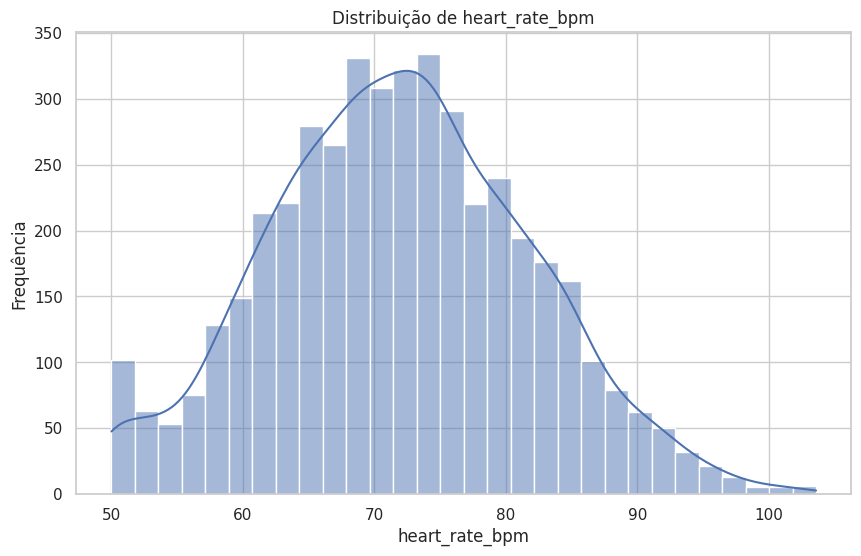

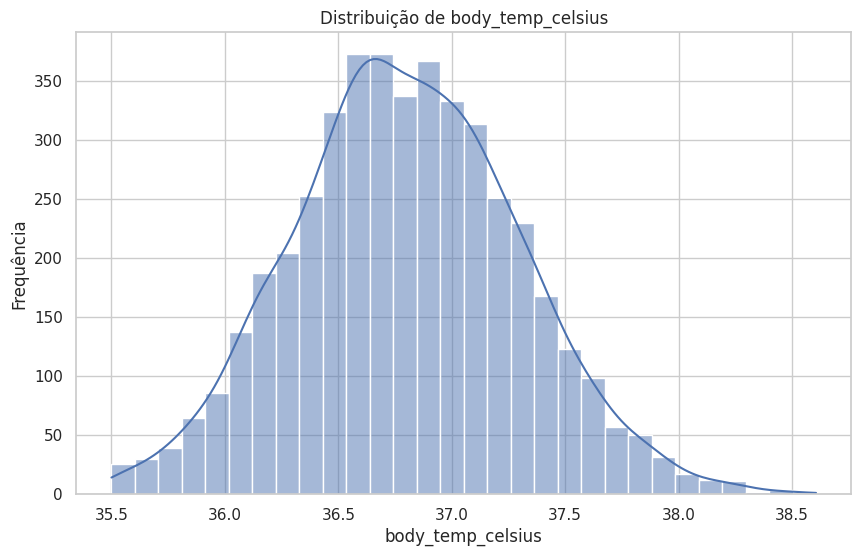

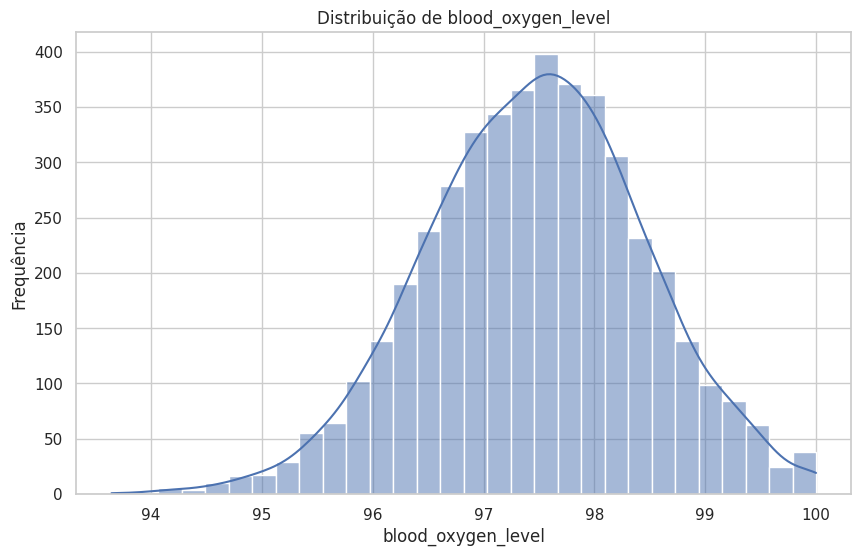

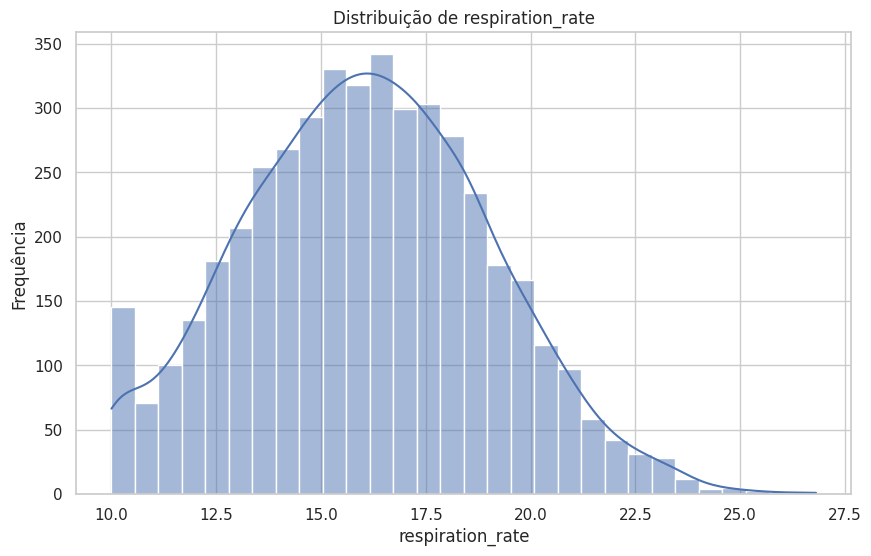

In [11]:

# Visualização da distribuição de variáveis fisiológicas
variaveis_fisiologicas = [
  "heart_rate_bpm",
  "body_temp_celsius",
  "blood_oxygen_level",
  "respiration_rate"
]


for var in variaveis_fisiologicas:
  sns.histplot(df[var], kde=True, bins=30)
  plt.title(f"Distribuição de {var}")
  plt.xlabel(var)
  plt.ylabel("Frequência")
  plt.show()



Frequência cardíaca: Distribuição normal centrada em torno de 72 bpm.

Temperatura corporal: Levemente assimétrica, com média próxima de 36.8 °C.

Oxigenação do sangue: Alta concentração entre 96% e 99%.

Taxa de respiração: Distribuição mais dispersa, com média em torno de 16 rpm.

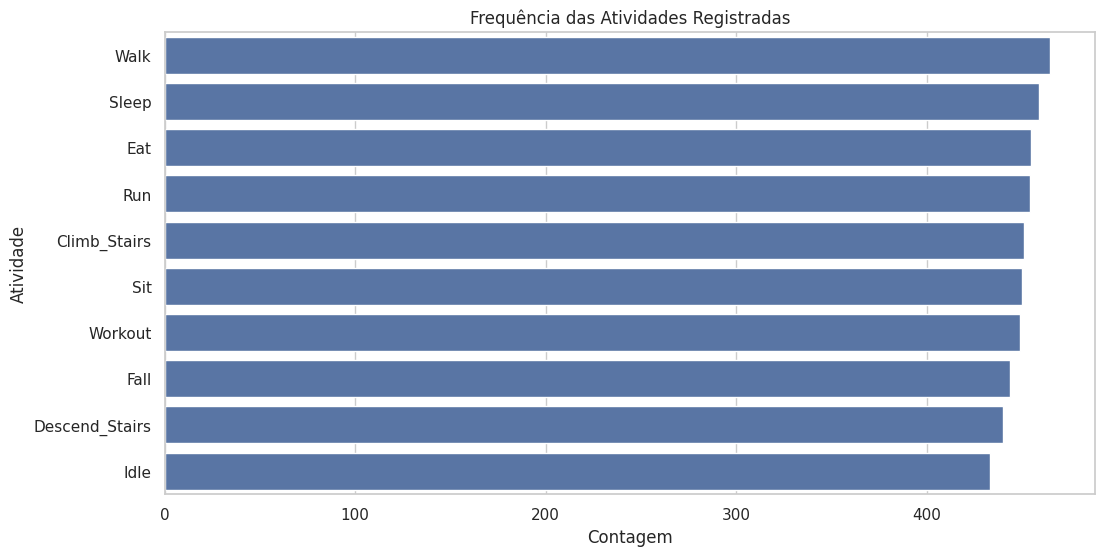

In [12]:

# Frequência das atividades registradas
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="activity_label", order=df["activity_label"].value_counts().index)
plt.title("Frequência das Atividades Registradas")
plt.xlabel("Contagem")
plt.ylabel("Atividade")
plt.show()


**Frequência das Atividades Registradas**

As atividades mais comuns no dataset incluem:

Walk

Climb_Stairs

Sit

Run

Sleep

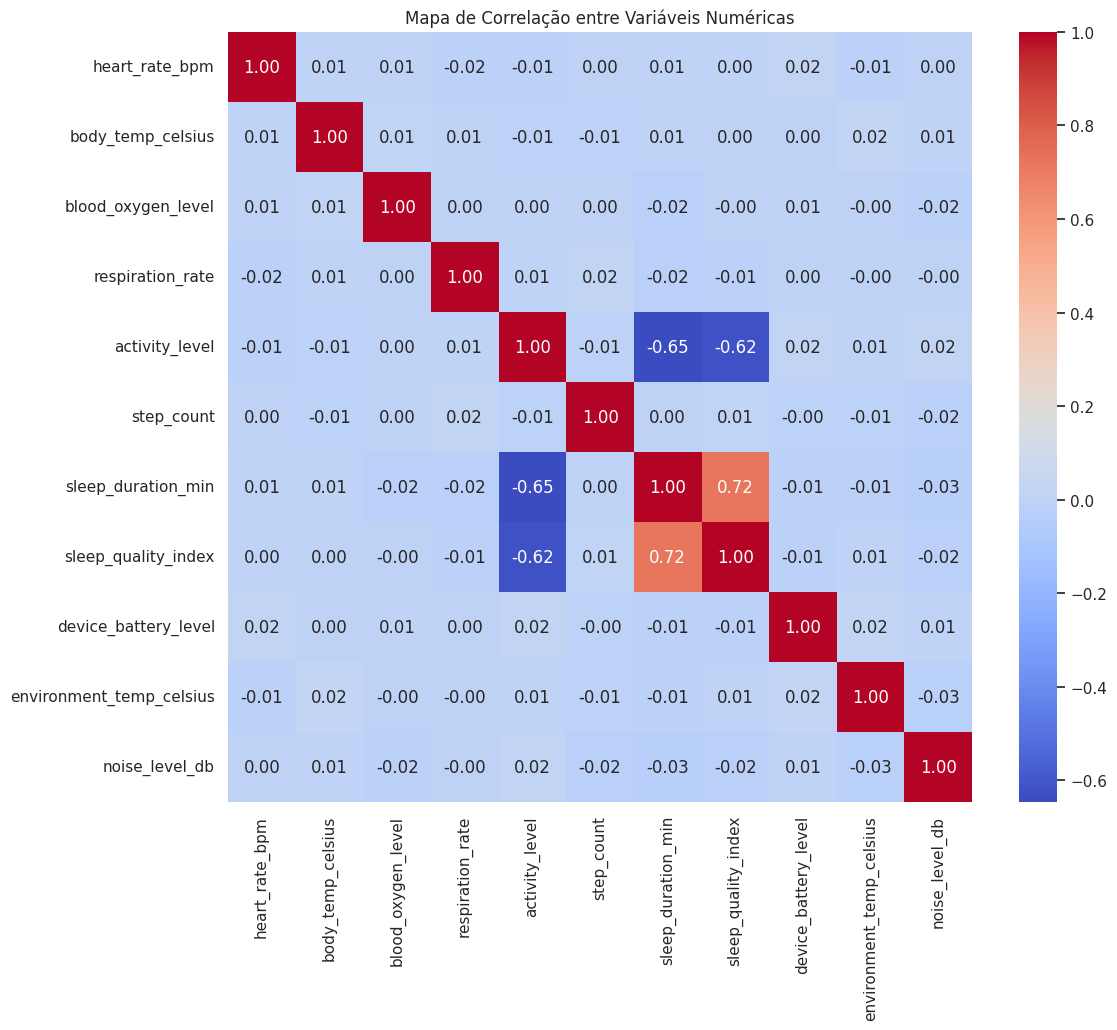

In [13]:

# Mapa de calor de correlação entre variáveis numéricas
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlação entre Variáveis Numéricas")
plt.show()


**Correlação entre Variáveis Fisiológicas**

O heatmap de correlação mostra:

Correlação moderada entre sleep_duration_min e sleep_quality_index.

Correlação baixa entre frequência cardíaca e outras variáveis.

A maioria das variáveis fisiológicas são relativamente independentes, o que é bom para modelagem.

## Análise Exploratória de Dados — Checklist

### 🔹 Quantos atributos e instâncias existem?
- **Instâncias (linhas):** 4.500  
- **Atributos (colunas):** 18

---

### 🔹 Quais são os tipos de dados dos atributos?

| Tipo de dado     | Atributos                                                                 |
|------------------|---------------------------------------------------------------------------|
| `object`         | `timestamp`, `device_id`, `user_id`, `location_type`, `activity_label`   |
| `float64`        | `heart_rate_bpm`, `body_temp_celsius`, `blood_oxygen_level`, `respiration_rate`, `sleep_duration_min`, `sleep_quality_index`, `device_battery_level`, `environment_temp_celsius`, `noise_level_db` |
| `int64`          | `activity_level`, `step_count`                                            |
| `bool`           | `is_synced_to_cloud`, `data_flag`                                         |

---

### Verifique as primeiras linhas do dataset. Algo chama a atenção?

As primeiras linhas mostram registros de sensores com dados fisiológicos e comportamentais. Exemplo:

| timestamp         | user_id | heart_rate_bpm | body_temp_celsius | blood_oxygen_level | activity_label   |
|------------------|---------|----------------|-------------------|---------------------|------------------|
| 01-07-2025 00:00 | USR_165 | 76.97          | 36.73             | 98.15               | Walk             |
| 01-07-2025 00:01 | USR_218 | 69.66          | 36.57             | 98.04               | Descend_Stairs   |
| 01-07-2025 00:02 | USR_286 | 61.87          | 36.96             | 96.59               | Sleep            |

**Observações:**
- Os dados parecem bem estruturados.
- Há uma variedade de atividades e valores fisiológicos realistas.
- Algumas linhas têm `sleep_duration_min = 0`, o que pode indicar ausência de sono naquele momento.

---

### Há valores faltantes, discrepantes ou inconsistentes?

- ✅ **Valores faltantes:** Nenhum valor ausente foi encontrado.
- ⚠️ **Discrepâncias:** Algumas variáveis como `sleep_duration_min` e `sleep_quality_index` têm muitos valores zerados, o que pode indicar períodos sem sono — não necessariamente inconsistência, mas algo a considerar na modelagem.

---

### Resumo estatístico dos atributos com valor numérico

| Atributo                  | Mínimo | Máximo | Mediana | Moda | Média | Desvio Padrão | Ausentes |
|---------------------------|--------|--------|---------|------|-------|----------------|----------|
| Frequência cardíaca (bpm) | 50.00  | 103.58 | 71.79   | 50.0 | 71.92 | 9.88           | 0        |
| Temperatura corporal (°C) | 35.50  | 38.61  | 36.79   | 35.5 | 36.80 | 0.50           | 0        |
| Oxigênio no sangue (%)    | 93.64  | 100.00 | 97.50   | 98.0 | 97.47 | 0.99           | 0        |
| Respiração (rpm)          | 10.00  | 26.81  | 16.07   | 10.0 | 16.08 | 2.94           | 0        |
| Nível de atividade        | 0.00   | 10.00  | 4.00    | 0.0  | 4.49  | 2.75           | 0        |
| Passos                    | 0.00   | 912.00 | 69.00   | 0.0  | 99.19 | 100.84         | 0        |
| Duração do sono (min)     | 0.00   | 479.80 | 0.00    | 0.0  | 67.88 | 133.27         | 0        |
| Qualidade do sono         | 0.00   | 1.00   | 0.00    | 0.0  | 0.13  | 0.27           | 0        |
| Bateria do dispositivo (%)| 10.00  | 99.90  | 55.50   | 10.0 | 55.27 | 25.84          | 0        |
| Temperatura ambiente (°C) | 18.00  | 35.00  | 26.60   | 20.0 | 26.56 | 4.83           | 0        |
| Nível de ruído (dB)       | 30.00  | 90.00  | 59.40   | 30.0 | 59.30 | 17.42          | 0        |

**Percepções:**
- Os dados estão bem distribuídos e dentro de faixas fisiológicas normais.
- A moda de várias variáveis é o valor mínimo, o que pode indicar concentração em valores baixos (ex: sono ausente).
- A variabilidade em `step_count` e `sleep_duration_min` é alta, o que pode ser útil para análise de comportamento.


## Pré-processamento de Dados


In [14]:
# Importação das bibliotecas
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


### Carregamento e Conversão de Datas

Convertendo a coluna `timestamp` para o tipo `datetime`, para facilitar análises temporais e ordenações cronológicas.


In [15]:
df = pd.read_csv("personalized_healthcare_dataset.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%d-%m-%Y %H:%M")


### Codificação de Variáveis Categóricas

As colunas `location_type` e `activity_label` são categóricas. Foi utilizado `LabelEncoder` para transformá-las em valores numéricos.


In [16]:
label_encoders = {}
for col in ['location_type', 'activity_label']:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le


### Conversão de Booleanos

As colunas booleanas `is_synced_to_cloud` e `data_flag` convertidas para inteiros (0 e 1)

In [17]:
df['is_synced_to_cloud'] = df['is_synced_to_cloud'].astype(int)
df['data_flag'] = df['data_flag'].astype(int)


### Normalização de Variáveis Numéricas

Aplicação da técnica de **Min-Max Scaling** para normalizar variáveis contínuas entre 0 e 1. O objetivo é evitar que variáveis com escalas maiores dominem o comportamento dos modelos.

Outra forma é utilizar a Padronização (Z-score standard)




In [18]:
numerical_cols = [
    'heart_rate_bpm', 'body_temp_celsius', 'blood_oxygen_level',
    'respiration_rate', 'activity_level', 'step_count',
    'sleep_duration_min', 'sleep_quality_index', 'device_battery_level',
    'environment_temp_celsius', 'noise_level_db'
]

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=[col + '_norm' for col in numerical_cols])
df = pd.concat([df, df_normalized], axis=1)


In [23]:
from sklearn.preprocessing import StandardScaler

# Selecionar colunas numéricas
numeric_cols = [
    'heart_rate_bpm', 'body_temp_celsius', 'blood_oxygen_level',
    'respiration_rate', 'activity_level', 'step_count',
    'sleep_duration_min', 'sleep_quality_index', 'device_battery_level',
    'environment_temp_celsius', 'noise_level_db'
]

# Aplicar padronização
scaler = StandardScaler()
df_zscore = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=[col + '_z' for col in numeric_cols])

# Adicionar ao dataframe original
df = pd.concat([df, df_zscore], axis=1)


### Detecção de Outliers

Foi utilizado o método do **Intervalo Interquartil (IQR)** para identificar valores extremos em variáveis fisiológicas.

In [19]:
outlier_summary = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

print("Número de outliers detectados por variável:")
for col, count in outlier_summary.items():
    print(f"{col}: {count}")


Número de outliers detectados por variável:
heart_rate_bpm: 15
body_temp_celsius: 23
blood_oxygen_level: 24
respiration_rate: 11
activity_level: 0
step_count: 211
sleep_duration_min: 977
sleep_quality_index: 1095
device_battery_level: 0
environment_temp_celsius: 0
noise_level_db: 0


### Discretização (Binning)

A discretização transforma uma variável contínua em **categorias**.  
A variável `heart_rate_bpm` foi dividida em **4 faixas** com base em quartis:
- Baixo
- Moderado
- Alto
- Muito Alto


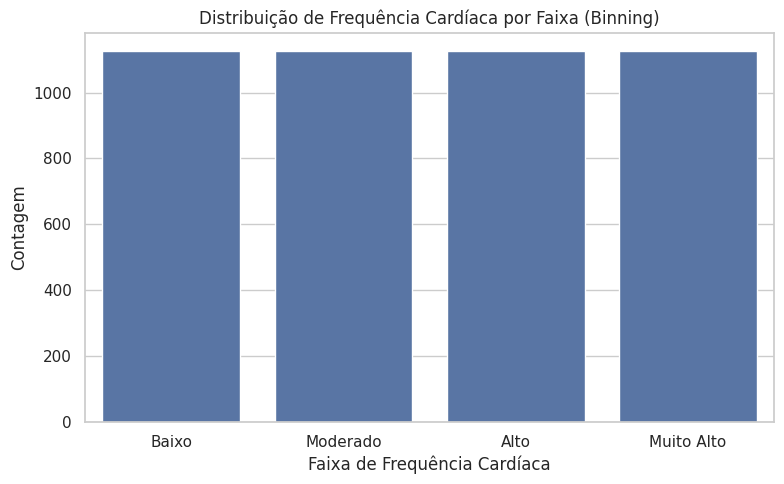

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Discretizar a frequência cardíaca
df['heart_rate_bin'] = pd.qcut(df['heart_rate_bpm'], q=4, labels=['Baixo', 'Moderado', 'Alto', 'Muito Alto'])

# Visualizar a distribuição
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='heart_rate_bin', order=['Baixo', 'Moderado', 'Alto', 'Muito Alto'])
plt.title("Distribuição de Frequência Cardíaca por Faixa (Binning)")
plt.xlabel("Faixa de Frequência Cardíaca")
plt.ylabel("Contagem")
plt.tight_layout()
plt.show()


### One-Hot Encoding

Transformação de variáveis categóricas em colunas binárias (0 ou 1).  
Evita que o modelo interprete categorias como ordinais.  
Aplicado às colunas:
- `location_type`
- `activity_label`


Comparação:

🔸 activity_label

Original: Distribuição por nome da atividade.

Codificada: Cada atividade virou uma coluna binária.

Resultado: Frequência preservada, mas agora em formato numérico.

🔸 location_type

Original: Indoor, Outdoor, Moving.

Codificada: Três colunas binárias.


In [21]:
from sklearn.preprocessing import OneHotEncoder

# Selecionar colunas categóricas
categorical_cols = ['location_type', 'activity_label']

# Aplicar One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Adicionar ao dataframe original
df = pd.concat([df, encoded_df], axis=1)

# Visualizar as novas colunas
df[encoded_df.columns].head()


,location_type_Indoor,location_type_Moving,location_type_Outdoor,activity_label_Climb_Stairs,activity_label_Descend_Stairs,activity_label_Eat,activity_label_Fall,activity_label_Idle,activity_label_Run,activity_label_Sit,activity_label_Sleep,activity_label_Walk,activity_label_Workout
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Análise Exploratória com Dados Transformados



### Distribuição das Variáveis Padronizadas (Z-score)
Objetivo: Verificar como as variáveis fisiológicas se comportam após padronização (média 0, desvio padrão 1).

Variáveis analisadas:

heart_rate_bpm_z

body_temp_celsius_z

blood_oxygen_level_z


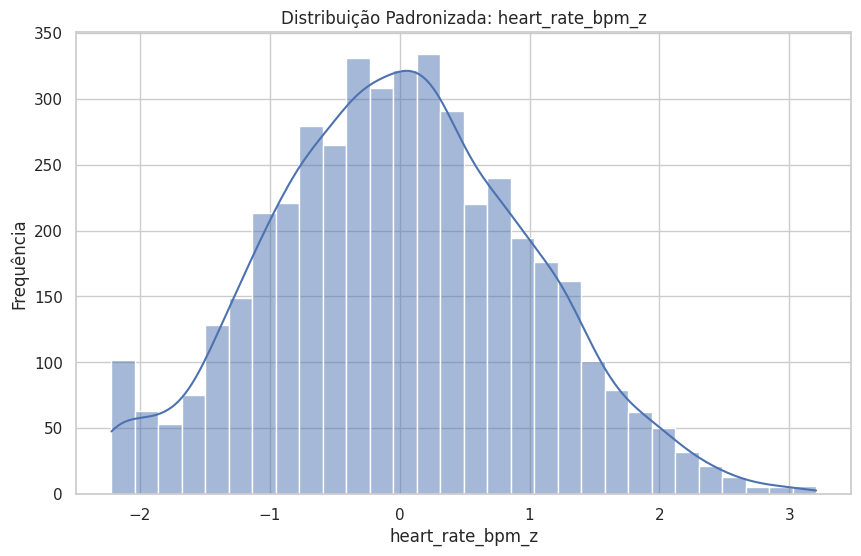

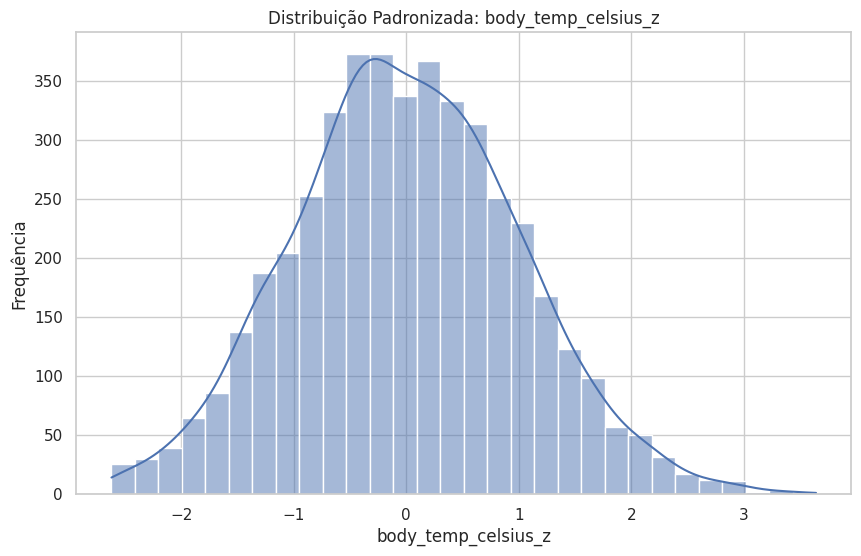

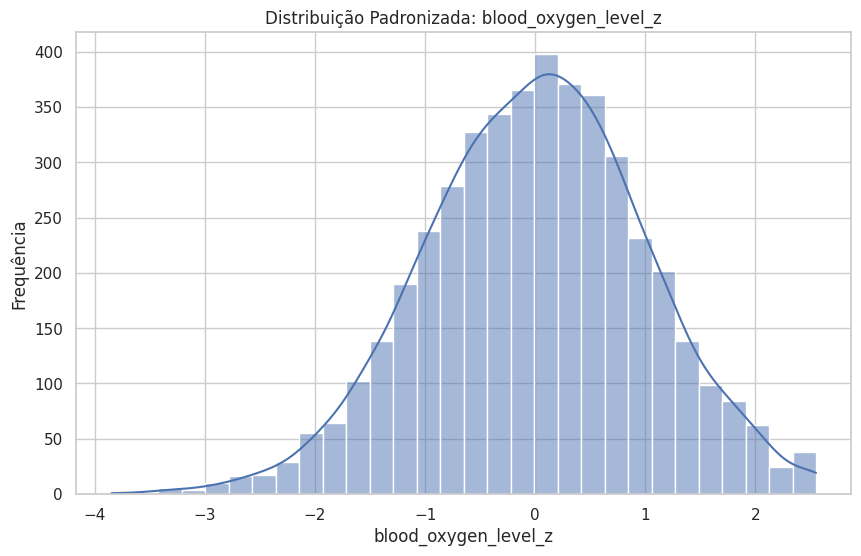

In [24]:
for col in ['heart_rate_bpm_z', 'body_temp_celsius_z', 'blood_oxygen_level_z']:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuição Padronizada: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()


**Insight:**

A distribuição original de heart_rate_bpm é centrada em torno de 72 bpm.
Após padronização, a distribuição é centrada em 0, com mesma forma, mas escala ajustada.



### Distribuição das Faixas de Frequência Cardíaca (Binning)


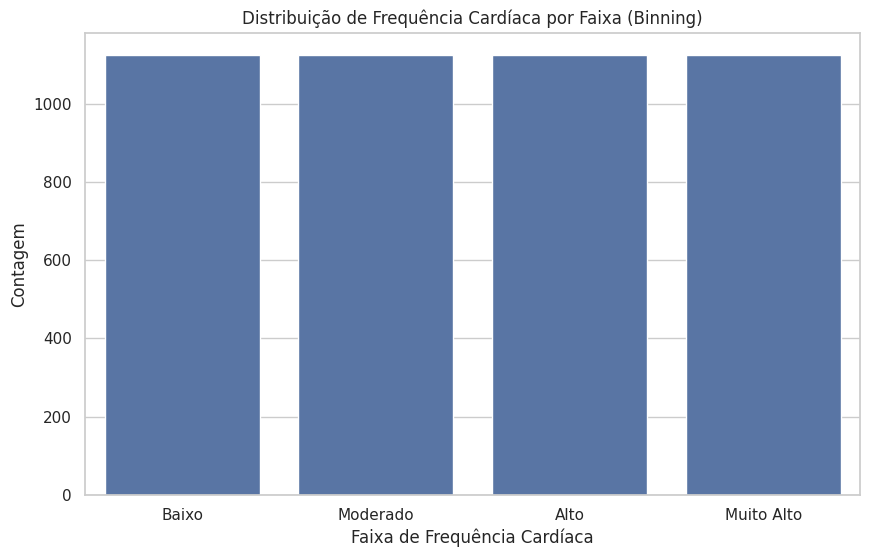

In [25]:
sns.countplot(data=df, x='heart_rate_bin', order=['Baixo', 'Moderado', 'Alto', 'Muito Alto'])
plt.title('Distribuição de Frequência Cardíaca por Faixa (Binning)')
plt.xlabel('Faixa de Frequência Cardíaca')
plt.ylabel('Contagem')
plt.show()


**Insight:**

As faixas estão bem distribuídas, permitindo segmentações úteis para análise de risco ou esforço físico.

### Distribuição das Atividades (One-Hot Encoding)
Objetivo: Verificar a frequência das atividades após codificação binária.

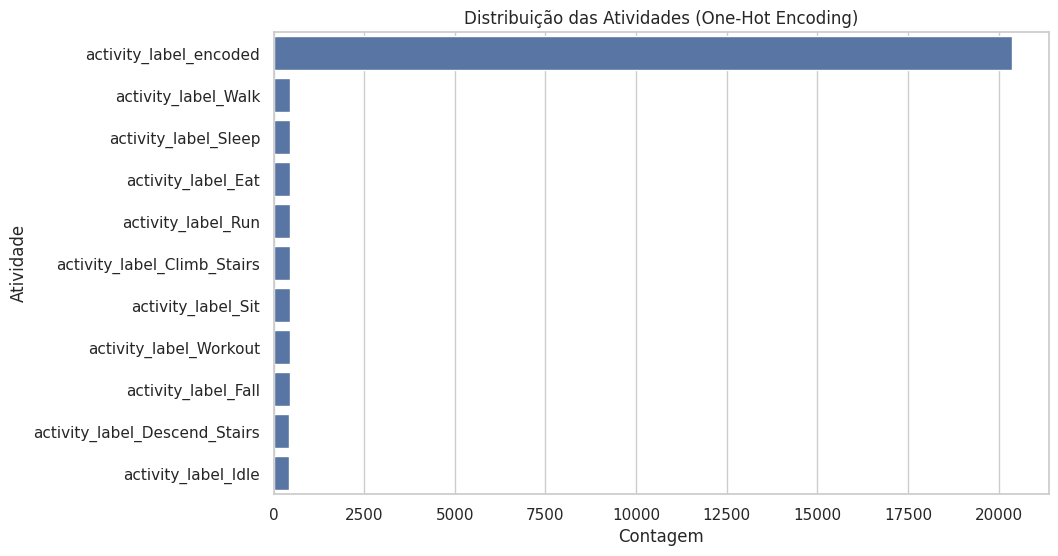

In [26]:
activity_cols = [col for col in df.columns if col.startswith('activity_label_')]
activity_counts = df[activity_cols].sum().sort_values(ascending=False)

sns.barplot(x=activity_counts.values, y=activity_counts.index)
plt.title('Distribuição das Atividades (One-Hot Encoding)')
plt.xlabel('Contagem')
plt.ylabel('Atividade')
plt.show()


**Insight:**

Atividades como Walk, Climb_Stairs e Sit continuam sendo as mais frequentes, agora representadas numericamente.

### Distribuição dos Tipos de Local (One-Hot Encoding)
Objetivo: Verificar a distribuição dos ambientes onde os dados foram coletados.

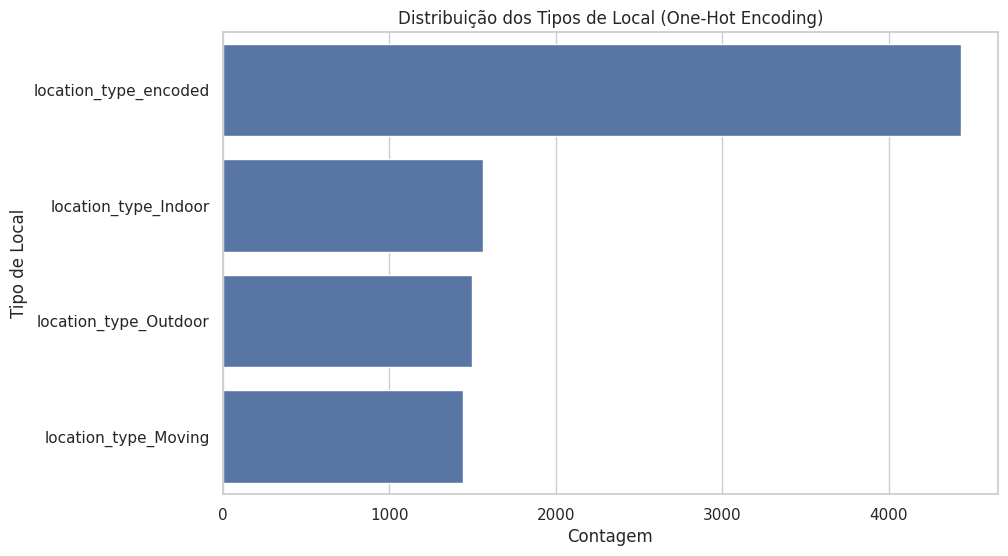

In [27]:
location_cols = [col for col in df.columns if col.startswith('location_type_')]
location_counts = df[location_cols].sum().sort_values(ascending=False)

sns.barplot(x=location_counts.values, y=location_counts.index)
plt.title('Distribuição dos Tipos de Local (One-Hot Encoding)')
plt.xlabel('Contagem')
plt.ylabel('Tipo de Local')
plt.show()


**Insight:**

Ambientes Indoor são os mais comuns, seguidos por Outdoor e Moving, o que pode influenciar padrões de atividade.

## ✅ Conclusão
- O dataset está **limpo, transformado e pronto** para modelagem.
- As transformações facilitaram a visualização de padrões e a preparação para algoritmos de ML.
- Próximos passos: **modelagem preditiva**, **clustering**, ou **análise temporal**.

